Setup and Data Import

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch_geometric.nn as geom_nn
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# Load the dataset
dataset_path = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\mosquito_resdev\mtmbiochemassdata.csv' # Replace with your dataset path
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataframe
df.head()


,ID,COUNTRY_NAME,ISO2,ADMIN1,ADMIN2,SITE_NAME,SITE_CODE,LATITUDE,LONGITUDE,TEST_TYPE,YEAR_START,VECTOR SPECIES,STAGE_ORIGIN,MOSQUITO_NUMBER,MECHANISM_STATUS,DATA_SOURCE,CITATION,CITATION_URL,DATA_CURATOR
0,IR000000622,Benin,BJ,Outmt,Adjarra,Adjarra,IRBJ3,6.5333,2.6667,kdr L1014F,2010,An. gambiae s.l.,F0_ADULTS_(FROM_WILD_LARVAE),27,Detected,Centre de Recherches Entomologiques de Cotonou,Aizoun et al. (2013) Comparison of the standar...,https://www.ncbi.nlm.nih.gov/pubmed/23688233,World Health Organization
1,IR000000623,Benin,BJ,Outmt,Adjarra,Adjarra,IRBJ3,6.5333,2.6667,Ace1R,2010,An. gambiae s.l.,F0_ADULTS_(FROM_WILD_LARVAE),Not available,Not detected,Centre de Recherches Entomologiques de Cotonou,Aizoun et al. (2013) Comparison of the standar...,https://www.ncbi.nlm.nih.gov/pubmed/23688233,World Health Organization
2,IR000000632,Benin,BJ,Outmt,Adjohoun,Adjohoun,IRBJ5,6.7072,2.4964,kdr L1014F,2010,An. coluzzii,NR,24,Detected,NaN,Padonou et al. (2012) Impact of three years of...,https://www.ncbi.nlm.nih.gov/pubmed/22490146,World Health Organization
3,IR000000634,Benin,BJ,Outmt,Adjohoun,Adjohoun,IRBJ5,6.7072,2.4964,Ace1R,2010,An. coluzzii,NR,24,Not detected,NaN,Padonou et al. (2012) Impact of three years of...,https://www.ncbi.nlm.nih.gov/pubmed/22490146,World Health Organization
4,IR000000644,Kenya,KE,Kisumu County,Nyando,Ahero,IRKE4,-0.1726,34.9198,kdr L1014F,2010,An. arabiensis,NR,100,Not detected,NaN,Ochomo et al. (2013) Pyrethroid resistance in ...,https://www.ncbi.nlm.nih.gov/pubmed/22861380,World Health Organization


In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv('mtmbiochemassdata.csv')

# One-hot encoding example
ohe = OneHotEncoder(sparse=False)
encoded_features = ohe.fit_transform(df[['COUNTRY_NAME', 'VECTOR SPECIES']])

# Label encoding example
le = LabelEncoder()
df['ADMIN1'] = le.fit_transform(df['ADMIN1'])

# Replace 'Not available' with NaN and convert column to numeric
df['MOSQUITO_NUMBER'] = pd.to_numeric(df['MOSQUITO_NUMBER'], errors='coerce')

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df['MOSQUITO_NUMBER'] = imputer.fit_transform(df[['MOSQUITO_NUMBER']])

# Standardize numerical features
scaler = StandardScaler()
df[['LATITUDE', 'LONGITUDE']] = scaler.fit_transform(df[['LATITUDE', 'LONGITUDE']])

# Encode target variable
df['MECHANISM_STATUS'] = df['MECHANISM_STATUS'].map({'Detected': 1, 'Not detected': 0})


c:\Users\rithv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
import pandas as pd

# Assuming 'df' is your original DataFrame after applying all preprocessing and feature engineering

# Select only the columns you need for modeling
modeling_columns = ['COUNTRY_NAME', 'VECTOR SPECIES', 'LATITUDE', 'LONGITUDE', 'YEAR_START', 'MOSQUITO_NUMBER', 'MECHANISM_STATUS']  # Add or remove columns as needed
modeling_df = df[modeling_columns]

# Save the DataFrame with the selected columns to a new CSV file
modeling_df.to_csv('mosquito_modeling_data.csv', index=False)

In [37]:
# Load the dataset
dataset2_path = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\mosquito_resdev\mosquito_modeling_data.csv' # Replace with your dataset path
df = pd.read_csv(dataset2_path)

# Display the first few rows of the dataframe
df.head()

,COUNTRY_NAME,VECTOR SPECIES,LATITUDE,LONGITUDE,YEAR_START,MOSQUITO_NUMBER,MECHANISM_STATUS
0,Benin,An. gambiae s.l.,-0.210991,-0.409886,2010,27.0,1
1,Benin,An. gambiae s.l.,-0.210991,-0.409886,2010,27.0,0
2,Benin,An. coluzzii,-0.191057,-0.414052,2010,24.0,1
3,Benin,An. coluzzii,-0.191057,-0.414052,2010,24.0,0
4,Kenya,An. arabiensis,-0.979655,0.379213,2010,100.0,0


Model and Data Preparation

In [45]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['COUNTRY_NAME', 'VECTOR SPECIES'])

# Split the data into features and target
X = df_encoded.drop('MECHANISM_STATUS', axis=1)  # Features
y = df_encoded['MECHANISM_STATUS']               # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
# Print the shapes of the splits
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (2744, 98)
Test features shape: (686, 98)
Training labels shape: (2744,)
Test labels shape: (686,)


In [47]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Initialize the model
# model = LogisticRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Predict on the training data
# train_predictions = model.predict(X_train)
# train_accuracy = accuracy_score(y_train, train_predictions)

# # Predict on the test data
# test_predictions = model.predict(X_test)
# test_accuracy = accuracy_score(y_test, test_predictions)

# # Print out the training and test accuracy
# print(f"Training Accuracy: {train_accuracy}")
# print(f"Test Accuracy: {test_accuracy}")


In [48]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# # Define the neural network
# class Net(nn.Module):
#     def __init__(self, input_size):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(input_size, 64)  # Input layer to hidden layer
#         self.fc2 = nn.Linear(64, 32)          # Hidden layer to hidden layer
#         self.fc3 = nn.Linear(32, 2)           # Hidden layer to output layer

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = self.fc3(x)  # No activation, as we'll use CrossEntropyLoss
#         return x

# # Prepare the data
# # Convert the pandas DataFrame to torch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# # Initialize the network and optimizer
# input_size = X_train.shape[1]
# net = Net(input_size)
# optimizer = optim.Adam(net.parameters(), lr=0.001)
# criterion = nn.CrossEntropyLoss()

# # Train the network
# num_epochs = 100
# for epoch in range(num_epochs):
#     net.train()
#     optimizer.zero_grad()
#     output = net(X_train_tensor)
#     loss = criterion(output, y_train_tensor)
#     loss.backward()
#     optimizer.step()

#     # Print loss every 10 epochs
#     if epoch % 10 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# # Evaluate the network
# net.eval()
# with torch.no_grad():
#     train_preds = torch.argmax(net(X_train_tensor), dim=1)
#     train_accuracy = accuracy_score(y_train_tensor, train_preds)
#     test_preds = torch.argmax(net(X_test_tensor), dim=1)
#     test_accuracy = accuracy_score(y_test_tensor, test_preds)

# print(f'Training Accuracy: {train_accuracy}')
# print(f'Test Accuracy: {test_accuracy}')


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, and y_test are already defined as per your earlier code

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy',  # Using binary_crossentropy for binary classification
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6336      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8449 (33.00 KB)
Trainable params: 8449 (33.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
df = pd.get_dummies(df, columns=['COUNTRY_NAME'])

In [52]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=10, verbose=1, validation_split=0.2)

# Evaluate the model
_, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
_, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/1000
 35/220 [===>..........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8343

c:\Users\rithv\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


220/220 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8150 - val_loss: 0.5296 - val_accuracy: 0.7468
Epoch 2/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8251 - val_loss: 0.5133 - val_accuracy: 0.7596
Epoch 3/1000
220/220 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8191 - val_loss: 0.5155 - val_accuracy: 0.7668
Epoch 4/1000
220/220 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8178 - val_loss: 0.5173 - val_accuracy: 0.7450
Epoch 5/1000
220/220 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8232 - val_loss: 0.5151 - val_accuracy: 0.7523
Epoch 6/1000
220/220 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8223 - val_loss: 0.5183 - val_accuracy: 0.7614
Epoch 7/1000
220/220 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8237 - val_loss: 0.5220 - val_accuracy: 0.7632
Epoch

In [53]:
model.save('mosresdev4_1000epochs_train85acc.keras')

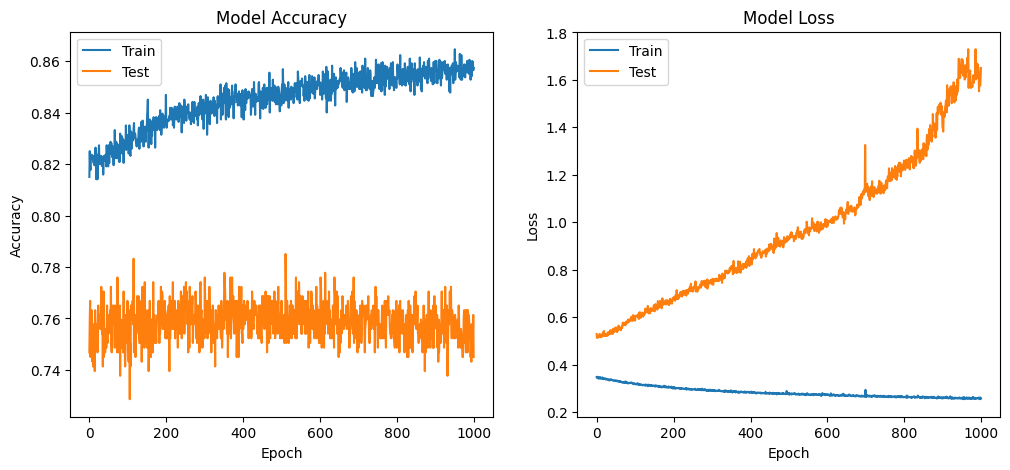

In [54]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [55]:
from tensorflow.keras.models import load_model

model1 = load_model(r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\mosquito_resdev\mosresdev4_1000epochs_train85acc.keras')  # Load the model

In [64]:
# Add missing columns with a default value of 0
for col in df_encoded.columns:
    if col not in additional_df_encoded:
        additional_df_encoded[col] = 0

# Drop any columns in additional_df_encoded that are not in df_encoded
additional_df_encoded = additional_df_encoded[df_encoded.columns]

# Verify the number of features
print("Number of features in the original data:", df_encoded.shape[1])
print("Number of features in the new data:", additional_df_encoded.shape[1])

Number of features in the original data: 99
Number of features in the new data: 99
